In [1]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("input/data-salary.txt")
df.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


In [3]:
X_new = [i for i in range(23, 61)]
data = {
    "N": len(df),
    "X": df["X"],
    "Y": df["Y"],
    "N_new": len(X_new),
    "X_new": X_new,
}
stan_model = pystan.StanModel(file="model/model4-4.stan")
fit = stan_model.sampling(data=data, seed=1234)
ms = fit.extract()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f9a9f7d23e1e21ee76b2805742abf8bf NOW.


In [4]:
print(ms["y_new"][0:5, 0:4])

[[434.75429055 399.41490146 420.0189777  415.94910101]
 [616.019693   329.47052572 521.84266965 249.49362854]
 [367.3364545  411.87223207 399.31053594 322.75659089]
 [415.20141049 452.72980809 444.03618221 358.43454631]
 [302.56557114 455.36316788 430.26368373 549.00581242]]


In [5]:
def get_quantile_mcmc(y_mcmc, p):
    return [np.percentile(y_mcmc[:, i], p) for i in range(y_mcmc.shape[1])]

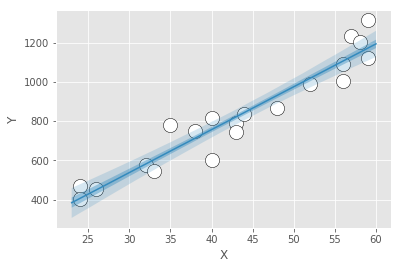

In [6]:
plt.scatter(df["X"],  df["Y"], s=200, color="white", edgecolors="black")
plt.fill_between(X_new, get_quantile_mcmc(ms["y_base_new"], 2.5), get_quantile_mcmc(ms["y_base_new"], 97.5), facecolor="C1", alpha=0.2)
plt.fill_between(X_new, get_quantile_mcmc(ms["y_base_new"], 25), get_quantile_mcmc(ms["y_base_new"], 75), facecolor="C1", alpha=0.4)
plt.plot(X_new, get_quantile_mcmc(ms["y_base_new"], 50), color="C1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

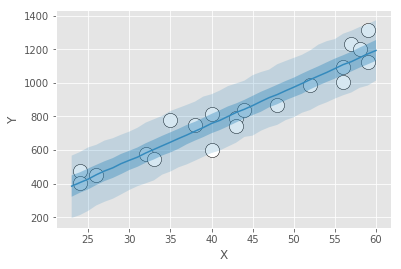

In [7]:
plt.scatter(df["X"],  df["Y"], s=200, color="white", edgecolors="black")
plt.fill_between(X_new, get_quantile_mcmc(ms["y_new"], 2.5), get_quantile_mcmc(ms["y_new"], 97.5), facecolor="C1", alpha=0.2)
plt.fill_between(X_new, get_quantile_mcmc(ms["y_new"], 25), get_quantile_mcmc(ms["y_new"], 75), facecolor="C1", alpha=0.4)
plt.plot(X_new, get_quantile_mcmc(ms["y_new"], 50), color="C1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()